#### Import Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#### Load the dataset

In [9]:
df = pd.read_csv('/content/Hotel Reservations Dataset - Hotel Reservations Dataset.csv')

#### Explore data

In [12]:
df.head()
df.describe()
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25299 entries, 0 to 25298
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   no_of_adults                25299 non-null  int64  
 1   no_of_children              25299 non-null  int64  
 2   type_of_meal_plan           25299 non-null  object 
 3   required_car_parking_space  25299 non-null  int64  
 4   room_type_reserved          25299 non-null  object 
 5   lead_time                   25299 non-null  int64  
 6   arrival_year                25299 non-null  int64  
 7   arrival_month               25299 non-null  int64  
 8   arrival_date                25299 non-null  int64  
 9   market_segment_type         25299 non-null  object 
 10  avg_price_per_room          25124 non-null  float64
 11  booking_status              25299 non-null  int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 2.3+ MB


##### Check Shape of the data

In [13]:
df.shape

(25299, 12)

#### Explore the Structure

In [18]:

df.describe()

,no_of_adults,no_of_children,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,avg_price_per_room,booking_status
count,25299.00000,25299.000000,25299.000000,25299.000000,25299.000000,25299.000000,25299.000000,25124.000000,25299.000000
mean,1.89715,0.144393,0.042848,67.009012,2017.854026,7.330132,15.765880,106.140796,0.292265
std,0.52664,0.467098,0.203102,68.777542,0.353087,3.135241,8.862943,37.932499,0.454812
min,0.00000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000
25%,2.00000,0.000000,0.000000,12.000000,2018.000000,5.000000,8.000000,80.750000,0.000000
50%,2.00000,0.000000,0.000000,45.000000,2018.000000,8.000000,16.000000,100.285000,0.000000
75%,2.00000,0.000000,0.000000,101.000000,2018.000000,10.000000,23.000000,127.800000,1.000000
max,4.00000,10.000000,2.000000,443.000000,2018.000000,12.000000,31.000000,540.000000,1.000000


In [16]:
df.columns

Index(['no_of_adults', 'no_of_children', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
       'avg_price_per_room', 'booking_status'],
      dtype='object')

#### Check Duplicates

In [19]:
df.duplicated().sum()

112

In [20]:
df.drop_duplicates(inplace=True)

#### Deal with duplicates

In [22]:
duplicate_rows = df[df.duplicated()]
print("Duplicate rows:")
print(duplicate_rows)

Duplicate rows:
Empty DataFrame
Columns: [no_of_adults, no_of_children, type_of_meal_plan, required_car_parking_space, room_type_reserved, lead_time, arrival_year, arrival_month, arrival_date, market_segment_type, avg_price_per_room, booking_status]
Index: []


In [23]:
# Remove duplicate rows, keeping the first occurrence
df_without_duplicates = df.drop_duplicates()


In [24]:
# Save the cleaned DataFrame to a new CSV file
df_without_duplicates.to_csv('cleaned_data.csv', index=False)

#### Check Missing Values

- Use graphical and no graphical approach ( hint: pandas function and missingno library)

In [25]:
# Check for missing values in each column
missing_values_count = df.isnull().sum()
print("Missing values in each column:")
print(missing_values_count)


Missing values in each column:
no_of_adults                    0
no_of_children                  0
type_of_meal_plan               0
required_car_parking_space      0
room_type_reserved              0
lead_time                       0
arrival_year                    0
arrival_month                   0
arrival_date                    0
market_segment_type             0
avg_price_per_room            172
booking_status                  0
dtype: int64


In [26]:
# Percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
no_of_adults                  0.000000
no_of_children                0.000000
type_of_meal_plan             0.000000
required_car_parking_space    0.000000
room_type_reserved            0.000000
lead_time                     0.000000
arrival_year                  0.000000
arrival_month                 0.000000
arrival_date                  0.000000
market_segment_type           0.000000
avg_price_per_room            0.682892
booking_status                0.000000
dtype: float64


Graphical Approach:


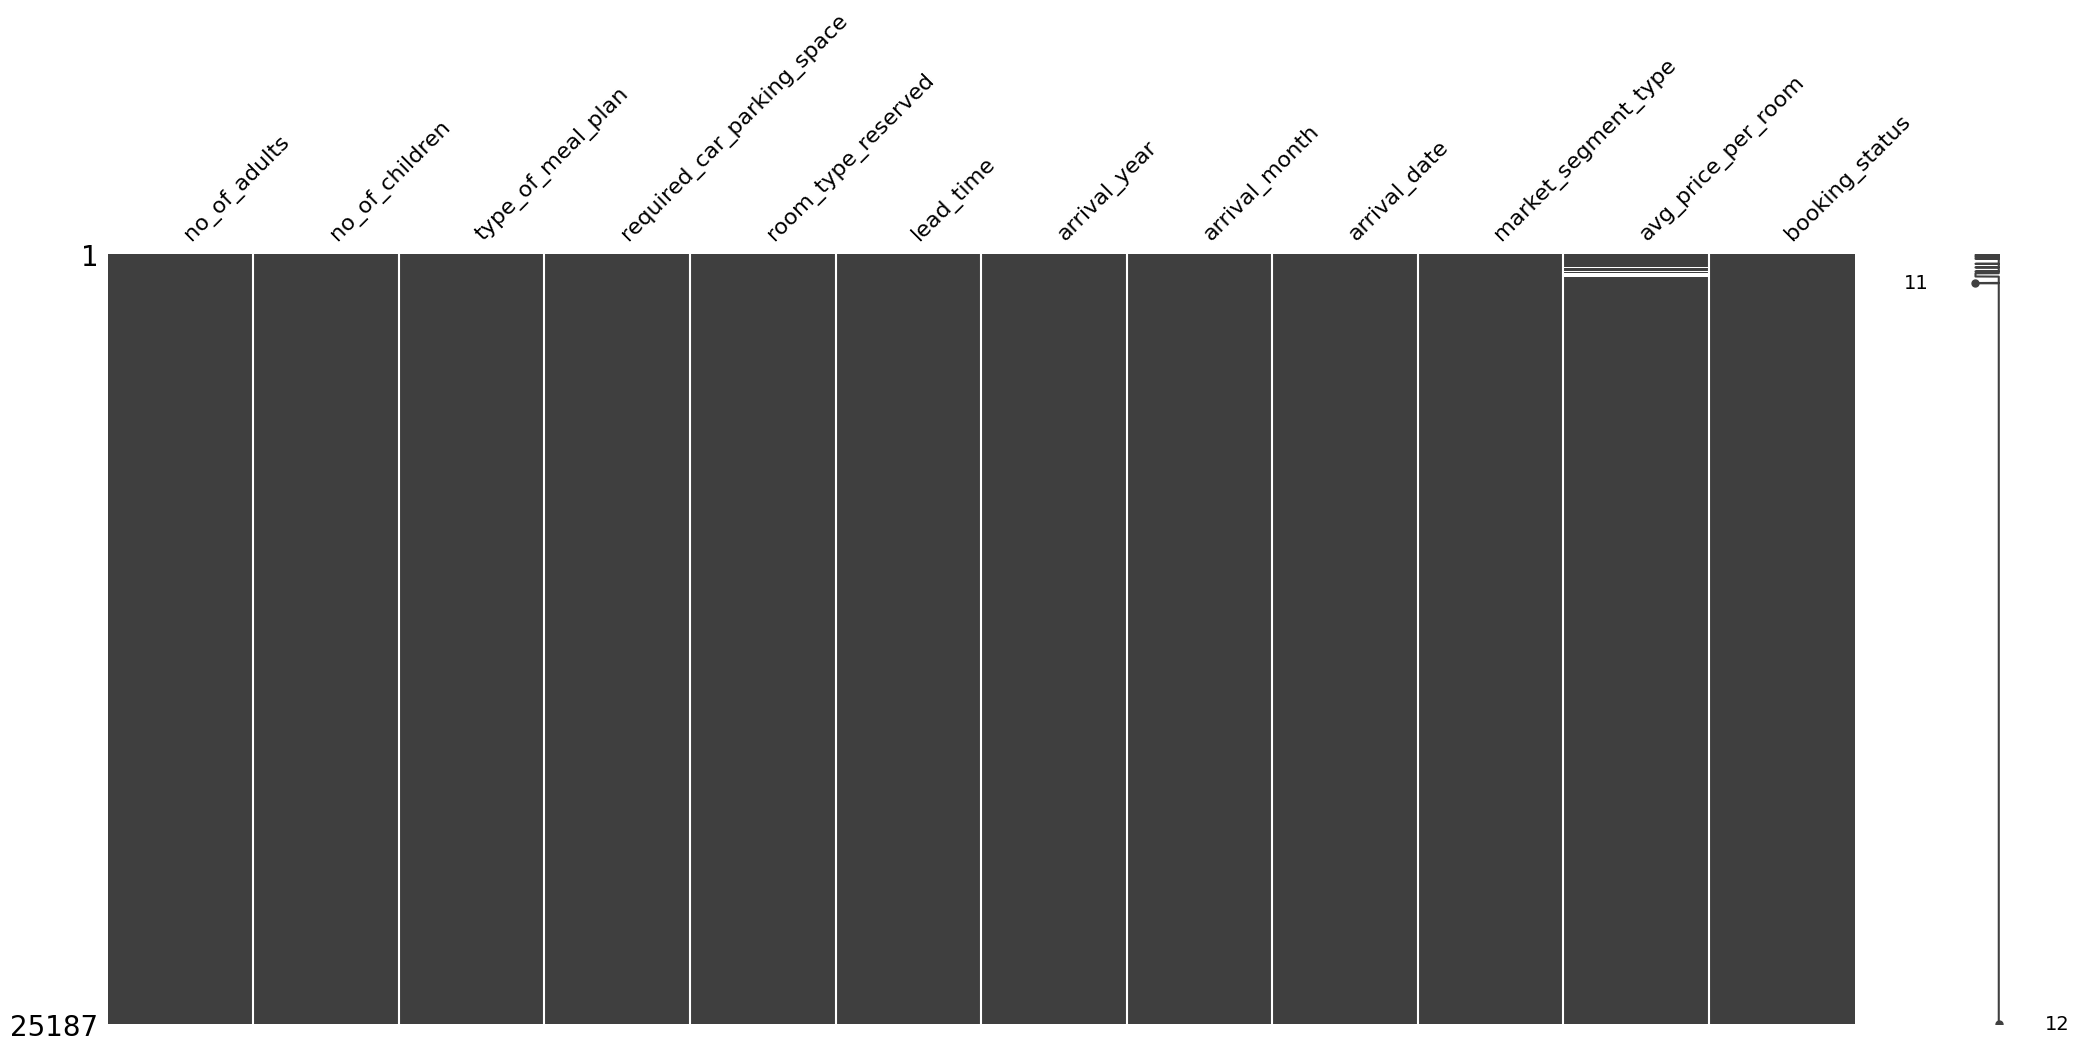

In [36]:

# Graphical Approach
print("Graphical Approach:")

# Matrix plot
msno.matrix(df)
plt.show()


# Dendrogram
#msno.dendrogram(df)
#plt.show()

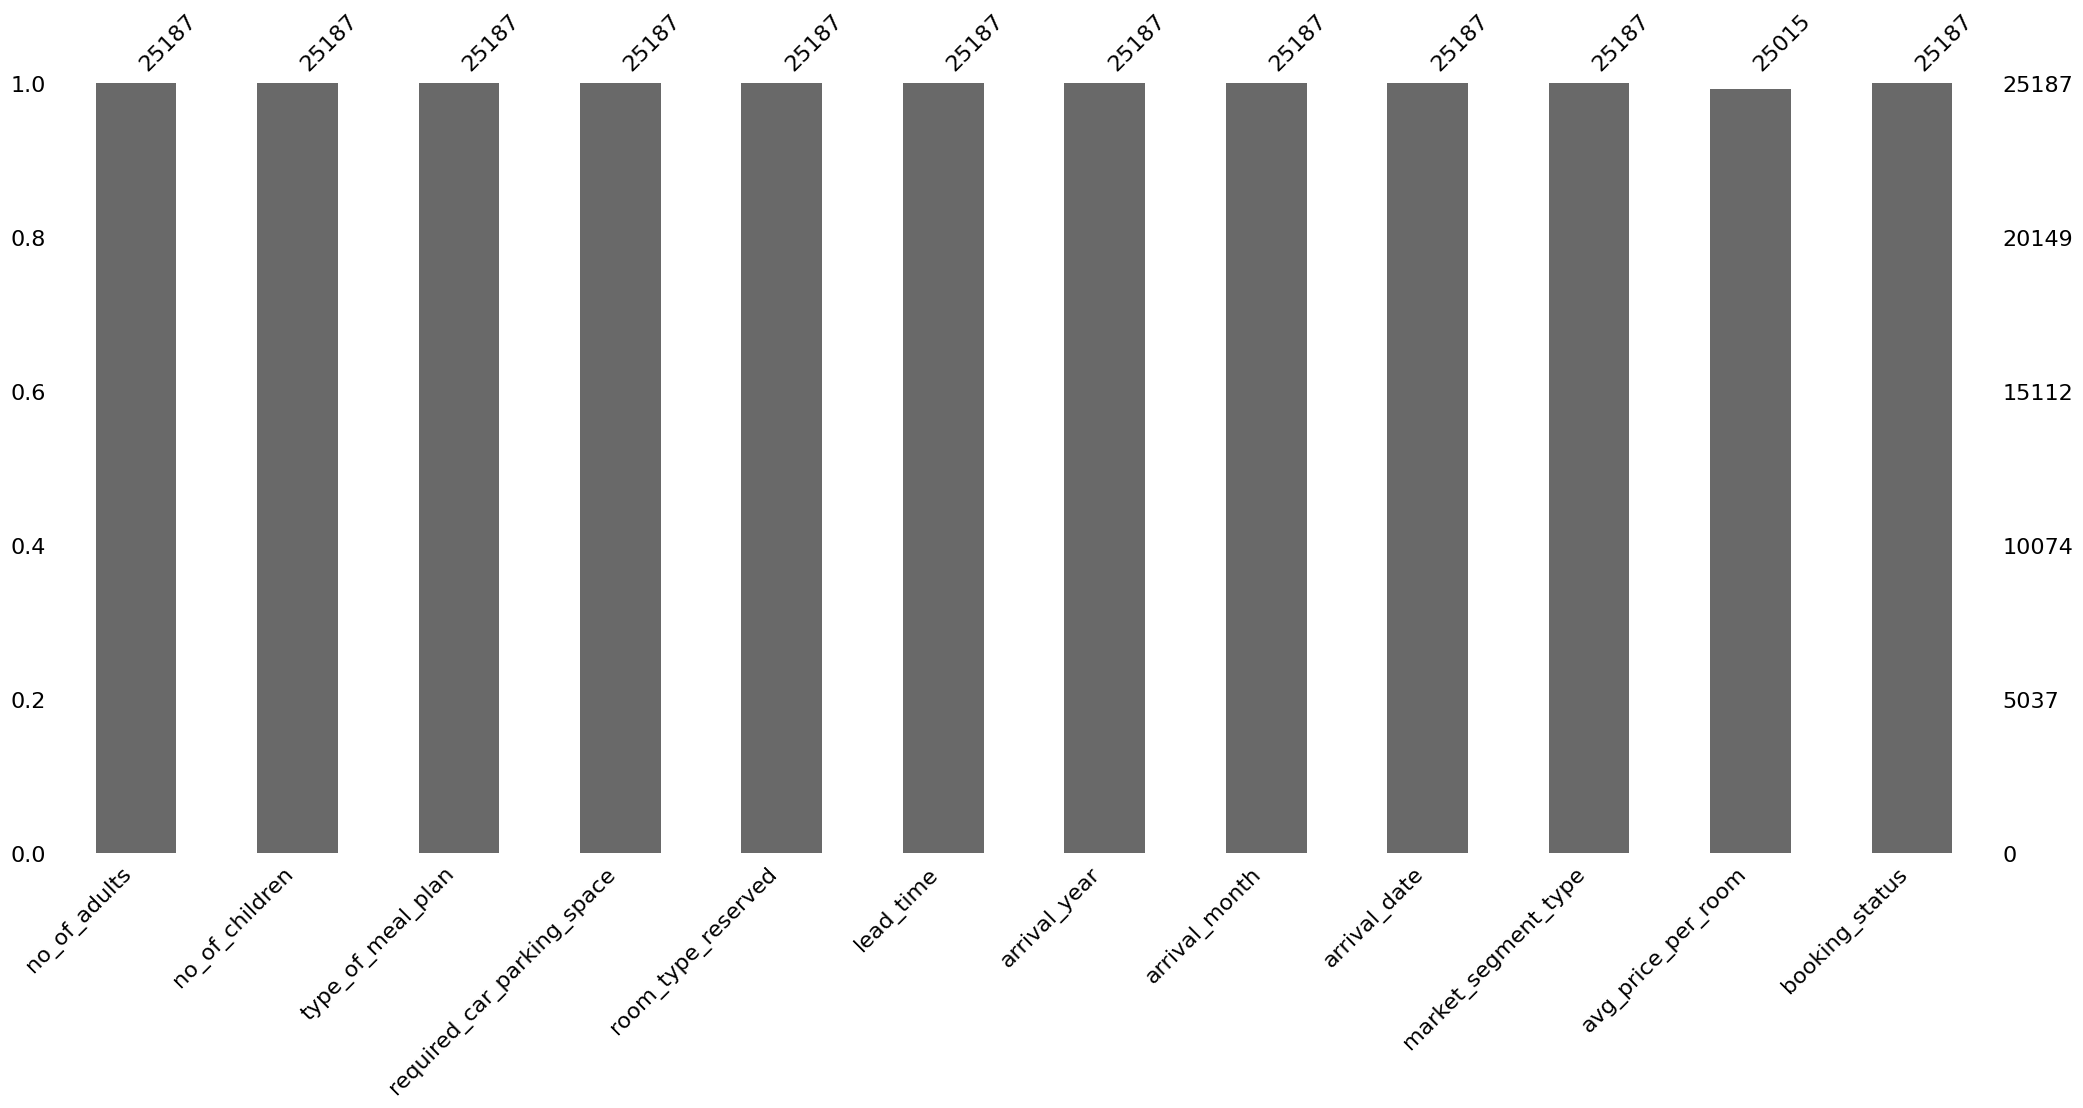

In [37]:
# Bar plot
msno.bar(df)
plt.show()

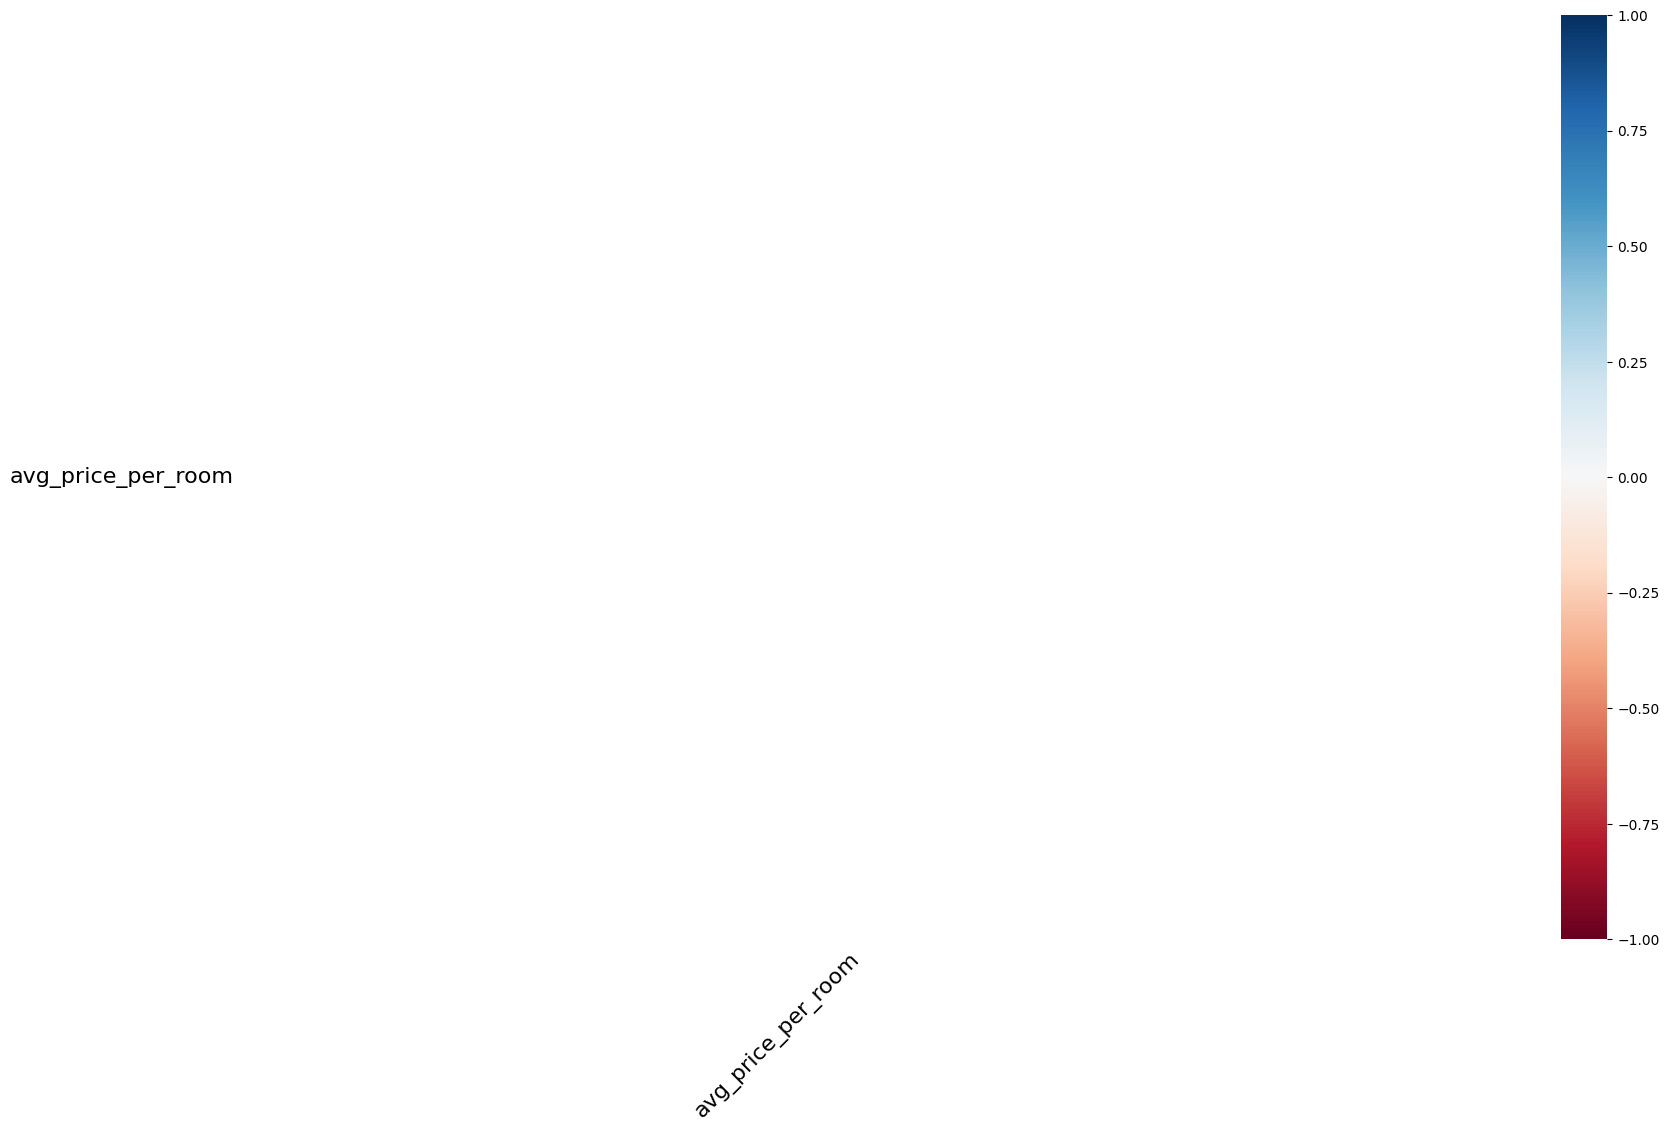

In [38]:
# Heatmap
msno.heatmap(df)
plt.show()

#### Deal with Missing values

In [28]:
# Remove columns with any missing values
df_cleaned = df.dropna(axis=1)

# Save the cleaned DataFrame to a new CSV file
df_cleaned.to_csv('cleaned_data.csv', index=False)

In [29]:
# Forward fill
df_ffill = df.fillna(method='ffill')

# Backward fill
df_bfill = df.fillna(method='bfill')

#### Encoding

**Identify columns and then find a suitable technique for it**

In [30]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:")
print(categorical_columns)

Categorical columns:
Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'], dtype='object')


In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:

# Apply Label Encoding to ordinal categorical columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

print(df.head())

   no_of_adults  no_of_children  type_of_meal_plan  \
0             2               0                  0   
1             2               0                  3   
2             1               0                  0   
3             2               0                  0   
4             2               0                  3   

   required_car_parking_space  room_type_reserved  lead_time  arrival_year  \
0                           0                   0        224          2017   
1                           0                   0          5          2018   
2                           0                   0          1          2018   
3                           0                   0        211          2018   
4                           0                   0         48          2018   

   arrival_month  arrival_date  market_segment_type  avg_price_per_room  \
0             10             2                    3               65.00   
1             11             6                    4     

In [34]:
# Apply One-Hot Encoding to nominal categorical columns
df_one_hot_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

print(df_one_hot_encoded.head())

   no_of_adults  no_of_children  required_car_parking_space  lead_time  \
0             2               0                           0        224   
1             2               0                           0          5   
2             1               0                           0          1   
3             2               0                           0        211   
4             2               0                           0         48   

   arrival_year  arrival_month  arrival_date  avg_price_per_room  \
0          2017             10             2               65.00   
1          2018             11             6              106.68   
2          2018              2            28               60.00   
3          2018              5            20              100.00   
4          2018              4            11               94.50   

   booking_status  type_of_meal_plan_1  ...  room_type_reserved_1  \
0               0                False  ...                 False   
1       